# 📝 Exercise M4.04

In the previous Module we tuned the hyperparameter `C` of the logistic
regression without mentioning that it controls the regularization strength.
Later, on the slides on 🎥 **Intuitions on regularized linear models** we
mentioned that a small `C` provides a more regularized model, whereas a
non-regularized model is obtained with an infinitely large value of `C`.
Indeed, `C` behaves as the inverse of the `alpha` coefficient in the `Ridge`
model.

In this exercise, we ask you to train a logistic regression classifier using
different values of the parameter `C` to find its effects by yourself.

We start by loading the dataset. We only keep the Adelie and Chinstrap classes
to keep the discussion simple.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [5]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
penguins = (
    penguins.set_index("Species").loc[["Adelie", "Chinstrap"]].reset_index()
)

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [6]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(
    penguins, random_state=0, test_size=0.4
)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

We define a function to help us fit a given `model` and plot its decision
boundary. We recall that by using a `DecisionBoundaryDisplay` with diverging
colormap, `vmin=0` and `vmax=1`, we ensure that the 0.5 probability is mapped
to the white color. Equivalently, the darker the color, the closer the
predicted probability is to 0 or 1 and the more confident the classifier is in
its predictions.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


def plot_decision_boundary(model):
    model.fit(data_train, target_train)
    accuracy = model.score(data_test, target_test)
    C = model.get_params()["logisticregression__C"]

    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        data_train,
        response_method="predict_proba",
        plot_method="pcolormesh",
        cmap="RdBu_r",
        alpha=0.8,
        vmin=0.0,
        vmax=1.0,
    )
    DecisionBoundaryDisplay.from_estimator(
        model,
        data_train,
        response_method="predict_proba",
        plot_method="contour",
        linestyles="--",
        linewidths=1,
        alpha=0.8,
        levels=[0.5],
        ax=disp.ax_,
    )
    sns.scatterplot(
        data=penguins_train,
        x=culmen_columns[0],
        y=culmen_columns[1],
        hue=target_column,
        palette=["tab:blue", "tab:red"],
        ax=disp.ax_,
    )
    plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
    plt.title(f"C: {C} \n Accuracy on the test set: {accuracy:.2f}")

Let's now create our predictive model.

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())

## Influence of the parameter `C` on the decision boundary

Given the following candidates for the `C` parameter and the
`plot_decision_boundary` function, find out the impact of `C` on the
classifier's decision boundary.

- How does the value of `C` impact the confidence on the predictions?
- How does it impact the underfit/overfit trade-off?
- How does it impact the position and orientation of the decision boundary?

Try to give an interpretation on the reason for such behavior.

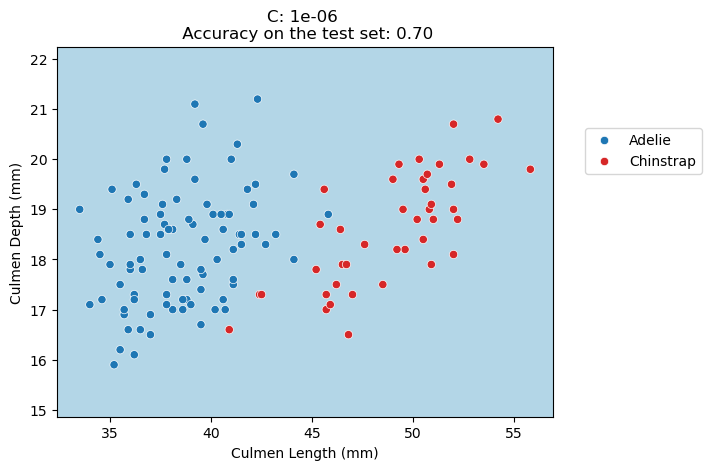

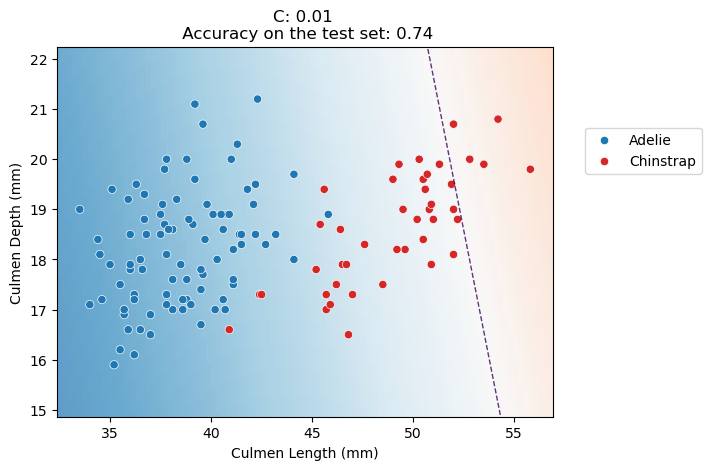

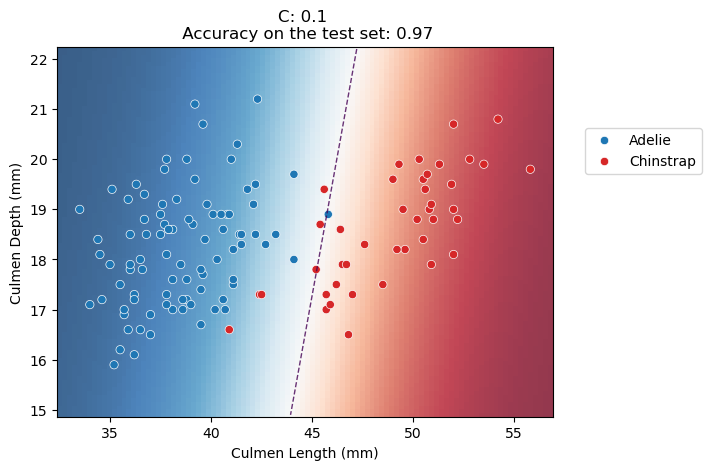

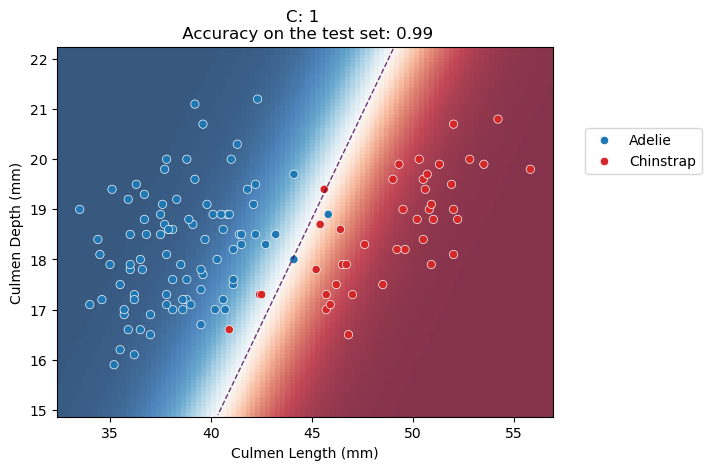

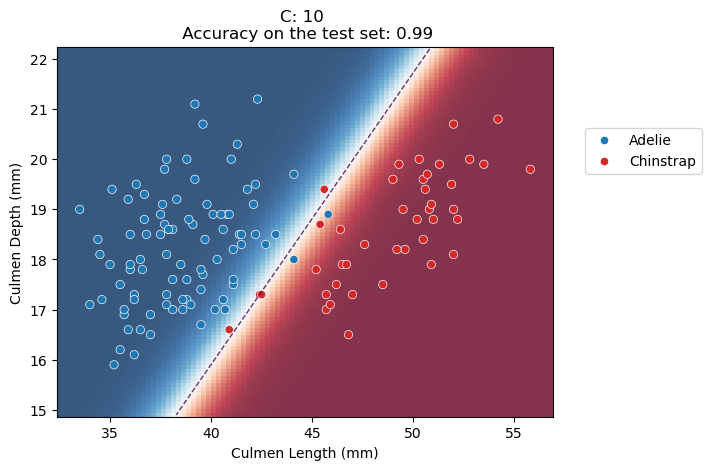

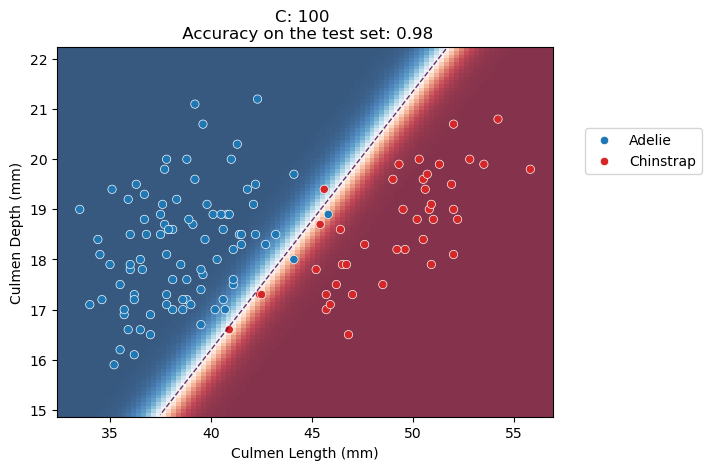

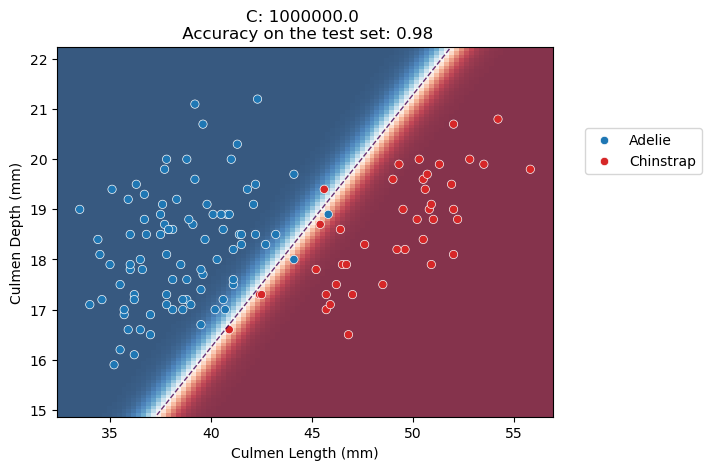

In [9]:
Cs = [1e-6, 0.01, 0.1, 1, 10, 100, 1e6]

# Write your code here.
for CC in Cs:
    # "logisticregression__C"
    tmp_params = {"logisticregression__C": CC}
    logistic_regression.set_params(**tmp_params)
    plot_decision_boundary(logistic_regression)

In [10]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
# LogisticRegressionCV
logistic_regression = make_pipeline(StandardScaler(), LogisticRegressionCV(Cs = Cs) )
# logistic_regression.get_params()
# tmp_params = {"logisticregressioncv__Cs":  Cs}
# logistic_regression.set_params(**tmp_params)
# logistic_regression.fit(data_train, target_train)

cv_results = cross_validate(
    logistic_regression,
    data_train,
    target_train,
    cv=10,
    return_estimator=True,
    return_train_score=True
)


In [11]:
data_train
target_train.value_counts()

Species
Adelie       89
Chinstrap    42
Name: count, dtype: int64

[None,
 Text(0.5, 0, 'Cs'),
 Text(0, 0.5, 'Mean squared error\n (lower is better)'),
 Text(0.5, 1.0, "Testing error in LogisticRegressionCV's inner cross-validation")]

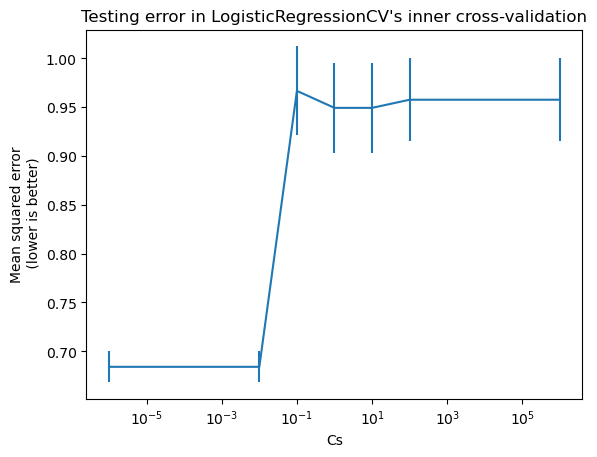

In [12]:
est_0 = cv_results["estimator"][0]
# est_0.feature_names_in_
df_cv_Cs = pd.DataFrame( est_0[-1].scores_['Chinstrap'], columns=Cs).describe().T
# df_cv_Cs
fig, ax = plt.subplots()

ax.errorbar(df_cv_Cs.index, df_cv_Cs['mean'], yerr=df_cv_Cs['std'])
ax.set(
    xscale = "log",
    xlabel = "Cs",
    ylabel = "Mean squared error\n (lower is better)",
    title  = "Testing error in LogisticRegressionCV's inner cross-validation"
)

In [13]:
# est_0[-1].scores_['Chinstrap'].shape, len(Cs)

In [14]:
pd.DataFrame(cv_results)

,fit_time,score_time,estimator,test_score,train_score
0,0.105691,0.002585,"(StandardScaler(), LogisticRegressionCV(Cs=[1e...",0.857143,0.965812
1,0.090585,0.002753,"(StandardScaler(), LogisticRegressionCV(Cs=[1e...",0.923077,0.983051
2,0.085608,0.004562,"(StandardScaler(), LogisticRegressionCV(Cs=[1e...",0.923077,0.974576
3,0.109113,0.006162,"(StandardScaler(), LogisticRegressionCV(Cs=[1e...",0.846154,0.983051
4,0.089103,0.002620,"(StandardScaler(), LogisticRegressionCV(Cs=[1e...",1.000000,0.949153
5,0.158838,0.004472,"(StandardScaler(), LogisticRegressionCV(Cs=[1e...",1.000000,0.957627
6,0.084287,0.003695,"(StandardScaler(), LogisticRegressionCV(Cs=[1e...",0.923077,0.983051
7,0.093256,0.002730,"(StandardScaler(), LogisticRegressionCV(Cs=[1e...",1.000000,0.974576
8,0.086001,0.004539,"(StandardScaler(), LogisticRegressionCV(Cs=[1e...",0.923077,0.991525
9,0.106707,0.005224,"(StandardScaler(), LogisticRegressionCV(Cs=[1e...",1.000000,0.949153


In [15]:
lgrCV = logistic_regression[-1]
lgrCV

,Cs,"[1e-06, 0.01, ...]"
,fit_intercept,True
,cv,None
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,100
,class_weight,None
,n_jobs,None


## Impact of the regularization on the weights

Look at the impact of the `C` hyperparameter on the magnitude of the weights.
**Hint**: You can [access pipeline
steps](https://scikit-learn.org/stable/modules/compose.html#access-pipeline-steps)
by name or position. Then you can query the attributes of that step such as
`coef_`.

<Axes: >

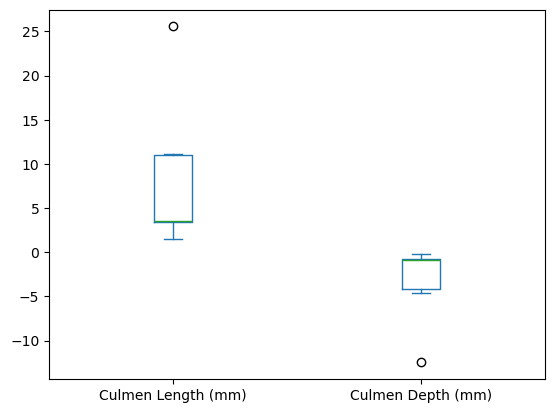

In [16]:
# Write your code here.
import numpy as np
# est_0.feature_names_in_
pd.DataFrame( [est[-1].coef_[0] for est in cv_results['estimator']], columns=est_0.feature_names_in_ ).plot.box()

## Impact of the regularization on with non-linear feature engineering

Use the `plot_decision_boundary` function to repeat the experiment using a
non-linear feature engineering pipeline. For such purpose, insert
`Nystroem(kernel="rbf", gamma=1, n_components=100)` between the
`StandardScaler` and the `LogisticRegression` steps.

- Does the value of `C` still impact the position of the decision boundary and
  the confidence of the model?
- What can you say about the impact of `C` on the underfitting vs overfitting
  trade-off?

In [ ]:
from sklearn.kernel_approximation import Nystroem
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_validate
# Write your code here.

mdl = make_pipeline(
    StandardScaler(),
    Nystroem(kernel="rbf", gamma=1, n_components=100),
    LogisticRegression()
)

cv_results_nystroem = cross_validate(
    estimator=mdl,
    X = data_train,
    y = target_train,
    cv = 10,
    return_estimator = True,
    return_train_score = True
)

pd.DataFrame(cv_results_nystroem)

,fit_time,score_time,estimator,test_score,train_score
0,0.194920,0.003835,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.928571,0.957265
1,0.111551,0.002980,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.923077,0.957627
2,0.254693,0.004328,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.923077,0.974576
3,0.191209,0.005168,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.846154,0.974576
4,0.078302,0.003098,"(StandardScaler(), Nystroem(gamma=1), Logistic...",1.000000,0.949153
5,0.078132,0.003079,"(StandardScaler(), Nystroem(gamma=1), Logistic...",1.000000,0.966102
6,0.010156,0.005161,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.923077,0.966102
7,0.014466,0.003309,"(StandardScaler(), Nystroem(gamma=1), Logistic...",1.000000,0.957627
8,0.014615,0.003111,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.923077,0.974576
9,0.010263,0.006088,"(StandardScaler(), Nystroem(gamma=1), Logistic...",1.000000,0.957627


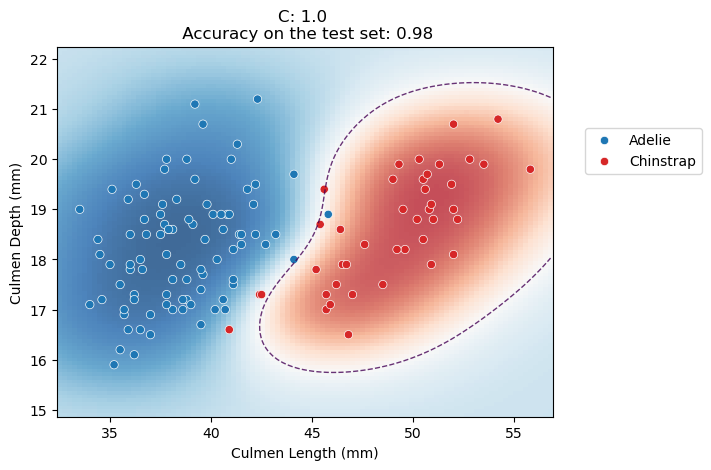

In [20]:
plot_decision_boundary(mdl)

In [38]:
from sklearn.kernel_approximation import Nystroem
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_validate
# Write your code here.


mdl = make_pipeline(
    StandardScaler(),
    Nystroem(kernel="rbf", gamma=1, n_components=100),
    LogisticRegressionCV(Cs=Cs)
)

cv_results_nystroem = cross_validate(
    estimator=mdl,
    X = data_train,
    y = target_train,
    cv = 10,
    return_estimator = True,
    return_train_score = True
)

pd.DataFrame(cv_results_nystroem)

,fit_time,score_time,estimator,test_score,train_score
0,0.176002,0.003354,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.928571,1.000000
1,0.100244,0.003424,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.923077,0.991525
2,0.107739,0.003837,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.923077,0.974576
3,0.111030,0.003265,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.846154,0.974576
4,0.150397,0.003821,"(StandardScaler(), Nystroem(gamma=1), Logistic...",1.000000,0.949153
5,0.096024,0.003721,"(StandardScaler(), Nystroem(gamma=1), Logistic...",1.000000,0.991525
6,0.092783,0.003760,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.923077,1.000000
7,0.091534,0.003795,"(StandardScaler(), Nystroem(gamma=1), Logistic...",1.000000,0.983051
8,0.250676,0.003300,"(StandardScaler(), Nystroem(gamma=1), Logistic...",0.923077,0.974576
9,0.129570,0.004050,"(StandardScaler(), Nystroem(gamma=1), Logistic...",1.000000,0.983051


In [42]:
# plot_decision_boundary(mdl[-1])
# mdl.get_params()
mdl #[-1].C_

# ?LogisticRegressionCV

,steps,"[('standardscaler', ...), ('nystroem', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,gamma,1
,coef0,None
,degree,None


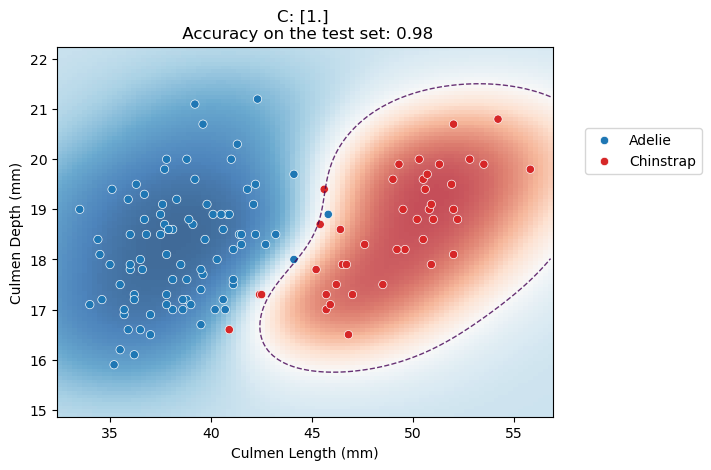

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


def plot_decision_boundary(model):
    model.fit(data_train, target_train)
    accuracy = model.score(data_test, target_test)
    # C = model.get_params()["logisticregression__C"]
    C = model[-1].C_
    

    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        data_train,
        response_method="predict_proba",
        plot_method="pcolormesh",
        cmap="RdBu_r",
        alpha=0.8,
        vmin=0.0,
        vmax=1.0,
    )
    DecisionBoundaryDisplay.from_estimator(
        model,
        data_train,
        response_method="predict_proba",
        plot_method="contour",
        linestyles="--",
        linewidths=1,
        alpha=0.8,
        levels=[0.5],
        ax=disp.ax_,
    )
    sns.scatterplot(
        data=penguins_train,
        x=culmen_columns[0],
        y=culmen_columns[1],
        hue=target_column,
        palette=["tab:blue", "tab:red"],
        ax=disp.ax_,
    )
    plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
    plt.title(f"C: {C} \n Accuracy on the test set: {accuracy:.2f}")

plot_decision_boundary(mdl)